# Project Description

This project aims to build a predictive model to analyze the relationship between a company's advertising expenditures across various media channels and the resulting sales figures. The dataset includes the following columns:

1. TV: The amount spent on TV advertising.
2. Radio: The amount spent on radio advertising.
3. Newspaper: The amount spent on newspaper advertising.
4. Sales: The sales achieved.

I will begin by building a simple linear regression model using only one variable—the one which has the highest coefficient—indicating the strongest relationship with sales. This will help us understand the impact of that specific advertising medium in isolation.

To accomplish this, I will use two different approaches:

1. Statsmodels:
2. Scikit-learn:

By leveraging these approaches, the objective is to determine the effectiveness of each advertising medium and to develop a model that can accurately predict sales based on advertising spend.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import files

uploaded = files.upload()

Saving advertising.csv to advertising.csv


# Reading the Dataset

In [4]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


We can see that the first three are the predictive variables and the 4th column is the target variable

In [5]:
#checking the shape

advertising.shape

(200, 4)

There are 200 rows and 4 columns in the dataset

In [6]:
#Checking for missing values in the data-set

advertising.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [7]:
# Checking for data types

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Checking other statistical informations to get an idea if the dataset have outliers

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


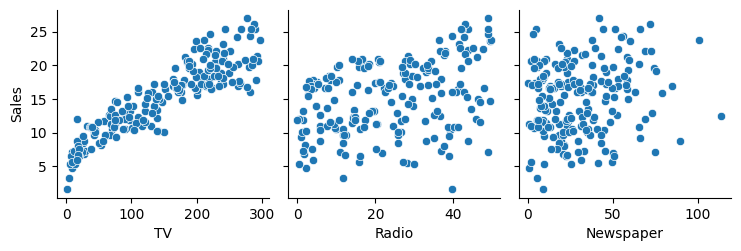

In [9]:
# Visualising the dataset using pairplots

sns.pairplot(data = advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')
plt.show()

As I can see that the most prominent linear relationship can be seen between TV and sales, so as I can use only one variable for Simple Linear Regression - I will use the variable "TV".

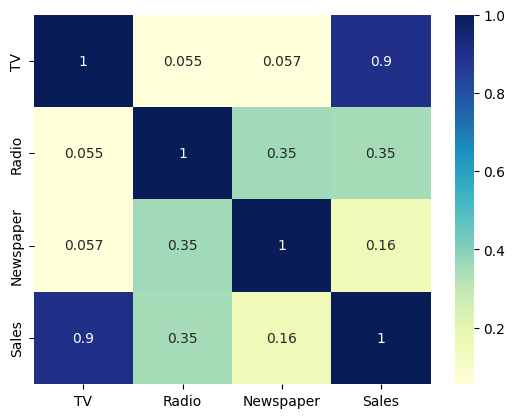

In [10]:
#Checking the co-relation using heatmaps

sns.heatmap(advertising.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# Building the Model

In [19]:
#creating X and y

X = advertising ['TV']
y = advertising ['Sales']

In [20]:
# doing the train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

Using random so that it seeds the random number and same train- test split is achieved when we build the same model using Sklearn

In [21]:
#confirming the shape

X_train.shape

(140,)

In [22]:
#Creating object of linear regression

lr_model = LinearRegression()

Sklearn expects the train data set as a 2-D array, but we have the shape of X_train as (140,) signifying a 1-D series

In [23]:
#Reshaping the train data

X_train_lm = X_train.values.reshape(-1,1)

In [24]:
#Reshaping the test data

X_test_lm = X_test.values.reshape(-1,1)

In [26]:
#Fitting the model

lr_model.fit(X_train_lm, y_train)

LinearRegression()

In [27]:
#Checking parameters

print(lr_model.intercept_)
print(lr_model.coef_)

6.948683200001357
[0.05454575]


So basically the formula concluded -

Sales = 6.95 + 0.05 TV

# 3. Making Predictions

In [29]:
#Making predictions on the train and test set

y_train_pred = lr_model.predict(X_train_lm)
y_test_pred = lr_model.predict(X_test_lm)

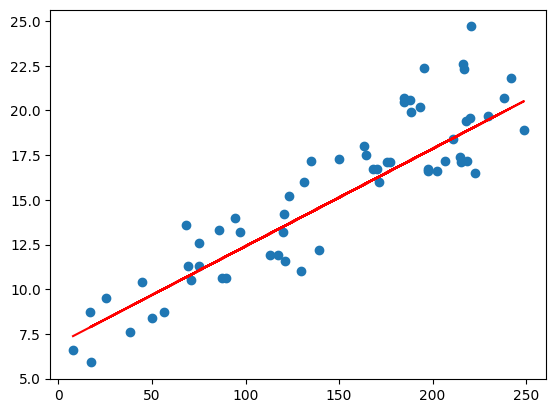

In [33]:
#plotting

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# 4. Residual Analysis

In [30]:
#creating res

res = y_train - y_train_pred
res.head()

,Sales
74,-1.588747
3,1.287635
185,4.469437
26,0.256729
90,-0.274178


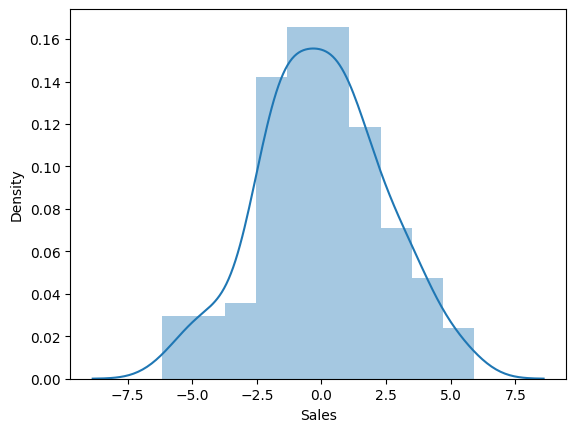

In [31]:
#ploting the residual distribution

sns.distplot(res)
plt.show()

Analysis of the residual -

1. It shows a normal distribution
2.  The distribution is centered around 0.

Thus the fundamental assumptions of linear regression

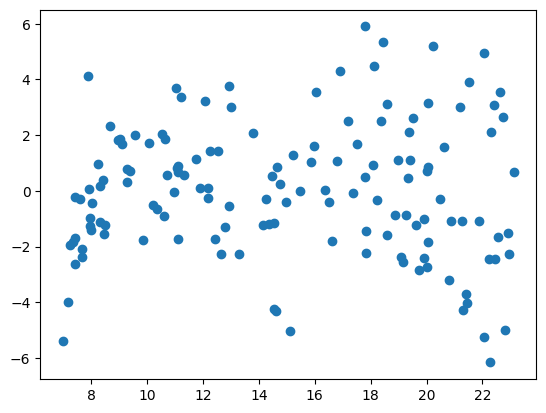

In [32]:
#Pattern check on residuals

plt.scatter(y_train_pred, res)
plt.show()

The assumption of LR that residuals are independent of other is respected.

# 5. Evaluation of the Model

In [34]:
#evaluating r2 score for test and train

print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480389
0.7921031601245662


### Conclusion

The training model achieved an R² value of 0.81, while the test model achieved an R² value of 0.79. This small variance of less than 5% indicates that the model is robust and performs well on unseen data. Therefore, the model is capable of making accurate predictions for new, unseen datasets, ensuring reliable forecasting of sales based on advertising spend.